**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from google.colab import drive

### Mounting the google drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Checking present working directory and  change the working directory

In [3]:
%pwd

'/content'

In [4]:
os.chdir("/content/drive/My Drive/Melanoma_Detection_Assignment/")

In [5]:
%pwd

'/content/drive/My Drive/Melanoma_Detection_Assignment'

### List of files and folders in the current working location

In [ ]:
!ls

CNN_Melanoma.ipynb  Test  Train  Train_Augmentor


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [12]:
# Defining the path for train and test images
# Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path("Test")

In [13]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Images in the Training dataset:",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Images in the Testing dataset:",image_count_test)

Images in the Training dataset: 2239
Images in the Testing dataset: 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [14]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [15]:
# Write your train dataset here
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(   
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [16]:
# Write your validation dataset here
# Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
# Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [17]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(" Total Number of skin cancer types are:", len(class_names),"\n","Which are -",class_names)

 Total Number of skin cancer types are: 9 
 Which are - ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

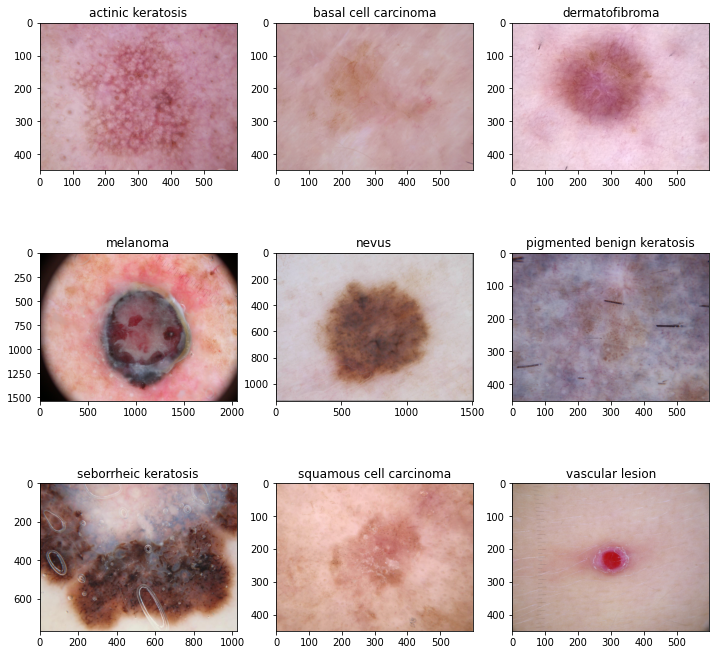

In [ ]:
# your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(12,12))
for i in range(len(class_names)): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
# Your code goes here
num_classes = len(class_names)
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
# Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 314s 962ms/step - loss: 2.0562 - accuracy: 0.1975 - val_loss: 2.0436 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 4s 78ms/step - loss: 2.0553 - accuracy: 0.2182 - val_loss: 2.0486 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 4s 78ms/step - loss: 2.0290 - accuracy: 0.1948 - val_loss: 2.0343 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 4s 80ms/step - loss: 2.0196 - accuracy: 0.2020 - val_loss: 2.0215 - val_accuracy: 0.1946
Epoch 5/20
56/56 [==============================] - 4s 78ms/step - loss: 1.9690 - accuracy: 0.2422 - val_loss: 1.9073 - val_accuracy: 0.3087
Epoch 6/20
56/56 [==============================] - 4s 78ms/step - loss: 1.8516 - accuracy: 0.2997 - val_loss: 1.9063 - val_accuracy: 0.2640
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 1.7656 - accuracy: 0.3516 - val_loss: 1.7340 - val_accuracy: 0.3669
Epoch 8/20
56/56 [===

### Visualizing training results

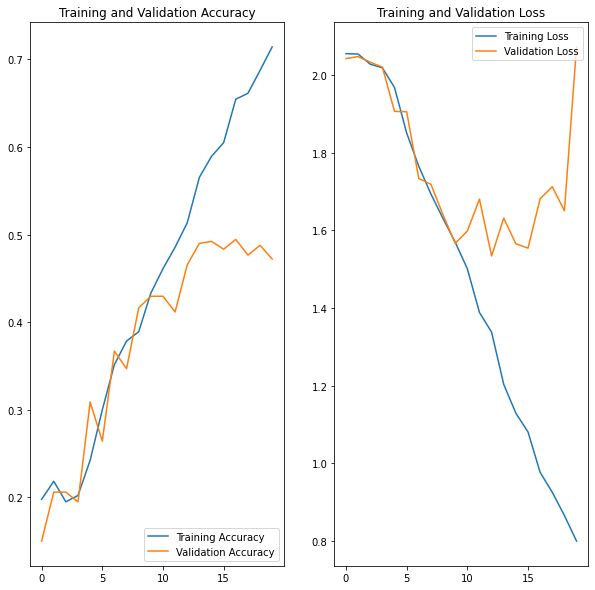

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



**Finding on the first base model**

- The above graphs clearly indicate that the model is suffering from overfitting because we can see the difference in loss functions in training & test around the 9th epoch

- The training accuracy is around 70% whereas for validation is only 45% for 20 epochs. Which clearly shows overfitting

- With these combinations of parameters definetly the model is overfitting

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

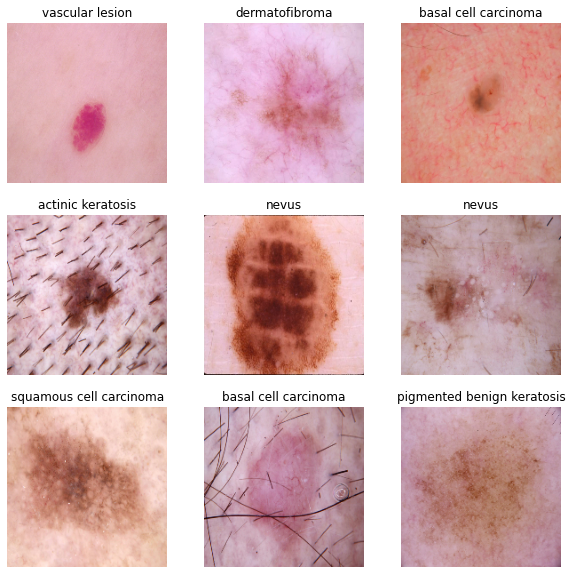

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
# You can use Dropout layer if there is an evidence of overfitting in your findings
num_classes = len(class_names)
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [ ]:
# Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
# Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 8s 109ms/step - loss: 2.0471 - accuracy: 0.2132 - val_loss: 1.8764 - val_accuracy: 0.3602
Epoch 2/20
56/56 [==============================] - 6s 104ms/step - loss: 1.8277 - accuracy: 0.3354 - val_loss: 1.6481 - val_accuracy: 0.3982
Epoch 3/20
56/56 [==============================] - 6s 104ms/step - loss: 1.7017 - accuracy: 0.3683 - val_loss: 1.6165 - val_accuracy: 0.4474
Epoch 4/20
56/56 [==============================] - 6s 104ms/step - loss: 1.6424 - accuracy: 0.4085 - val_loss: 1.9014 - val_accuracy: 0.2617
Epoch 5/20
56/56 [==============================] - 6s 104ms/step - loss: 1.6444 - accuracy: 0.4023 - val_loss: 1.6129 - val_accuracy: 0.4295
Epoch 6/20
56/56 [==============================] - 6s 103ms/step - loss: 1.5849 - accuracy: 0.4291 - val_loss: 1.7353 - val_accuracy: 0.3960
Epoch 7/20
56/56 [==============================] - 6s 104ms/step - loss: 1.5442 - accuracy: 0.4498 - val_loss: 1.5400 - val_accuracy: 0.4698
Epoch 8/20
56/56 

### Visualizing the results

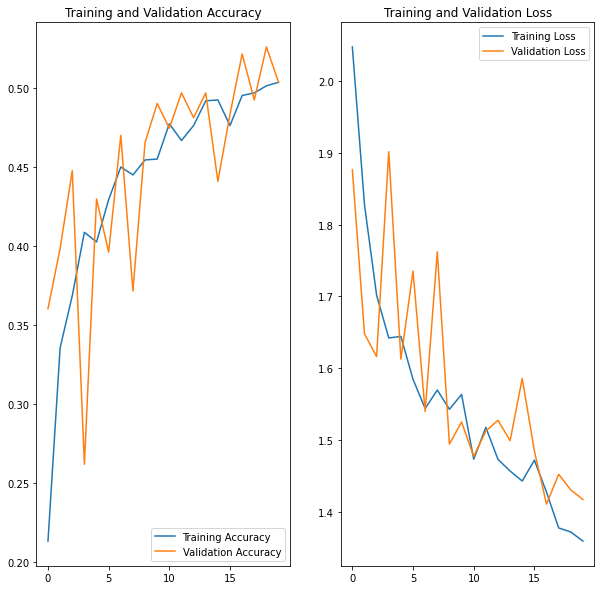

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Finding from Second Model**

- Due to data augmentation, we have succefully handled the overfitting problem whereas no improment in accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
# sanity check
path_lt=[]
lesion_lt=[]
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_lt.append(str(j))
        lesion_lt.append(i)
df_dict_original = dict(zip(path_lt, lesion_lt))
original_df = pd.DataFrame(list(df_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Train/actinic keratosis/ISIC_0026765.jpg,actinic keratosis
1,Train/actinic keratosis/ISIC_0026729.jpg,actinic keratosis
2,Train/actinic keratosis/ISIC_0026194.jpg,actinic keratosis
3,Train/actinic keratosis/ISIC_0026468.jpg,actinic keratosis
4,Train/actinic keratosis/ISIC_0026212.jpg,actinic keratosis
...,...,...
2234,Train/vascular lesion/ISIC_0032538.jpg,vascular lesion
2235,Train/vascular lesion/ISIC_0033458.jpg,vascular lesion
2236,Train/vascular lesion/ISIC_0033565.jpg,vascular lesion
2237,Train/vascular lesion/ISIC_0034214.jpg,vascular lesion


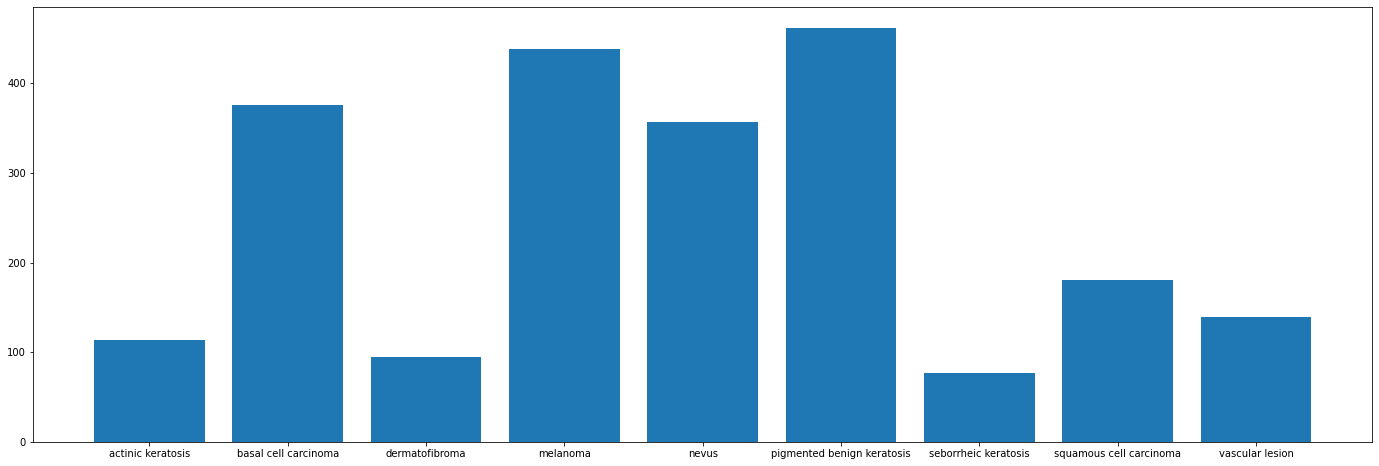

In [ ]:
# To check least and dominant samples
counts=[]
for i in class_names:
    counts.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(24,8))
plt.bar(class_names,counts)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Answer 1 :- **Seborrheic keratosis** has least number of samples

Answer 2:- **Pigmented benign keratosis** be the dominating classes followed by **Melanoma**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) # We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F8C3D461DF0>: 100%|██████████| 500/500 [00:45<00:00, 10.95 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8C3D2E32E0>: 100%|██████████| 500/500 [00:40<00:00, 12.22 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CB8546FD0>: 100%|██████████| 500/500 [00:43<00:00, 11.52 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8CB8714CA0>: 100%|██████████| 500/500 [00:54<00:00,  9.24 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8CB869ECA0>: 100%|██████████| 500/500 [00:53<00:00,  9.29 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CB86FF1C0>: 100%|██████████| 500/500 [00:39<00:00, 12.53 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8CA014DA60>: 100%|██████████| 500/500 [00:44<00:00, 11.23 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F8C3D5D9490>: 100%|██████████| 500/500 [00:39<00:00, 12.59 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F8CB8698F10>: 100%|██████████| 500/500 [00:39<00:00, 12.61 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
data_dir_train1 = pathlib.Path("Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [ ]:
for i in class_names:
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_lt.append(str(j))
        lesion_lt.append(i)
df_dict_original = dict(zip(path_lt, lesion_lt))
new_df = pd.DataFrame(list(df_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,Train/actinic keratosis/ISIC_0026765.jpg,actinic keratosis
1,Train/actinic keratosis/ISIC_0026729.jpg,actinic keratosis
2,Train/actinic keratosis/ISIC_0026194.jpg,actinic keratosis
3,Train/actinic keratosis/ISIC_0026468.jpg,actinic keratosis
4,Train/actinic keratosis/ISIC_0026212.jpg,actinic keratosis
...,...,...
6734,Train/output/vascular lesion/vascular lesion_o...,vascular lesion
6735,Train/output/vascular lesion/vascular lesion_o...,vascular lesion
6736,Train/output/vascular lesion/vascular lesion_o...,vascular lesion
6737,Train/output/vascular lesion/vascular lesion_o...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1418
melanoma                      1343
basal cell carcinoma          1106
nevus                         1086
squamous cell carcinoma        527
vascular lesion                415
actinic keratosis              309
dermatofibroma                 291
seborrheic keratosis           244
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [18]:
batch_size = 32
img_height = 180
img_width = 180

In [19]:
data_dir_train1=pathlib.Path("Train")
# data_dir_train1=pathlib.Path("Train")
data_dir_train1

PosixPath('Train_Augmentor')

#### **Todo:** Create a training dataset

In [20]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print("Images in the Training dataset:",image_count_train1)

Images in the Training dataset: 6739


In [21]:
# Only for training
data_dir_train1=pathlib.Path("Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [22]:
# Only for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [23]:
# You can use Dropout layer if there is an evidence of overfitting in your findings
num_classes = len(class_names)
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [24]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [25]:
epochs =30 #Train the model for ~30 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 1506s 9s/step - loss: 1.9274 - accuracy: 0.2672 - val_loss: 1.7669 - val_accuracy: 0.3437
Epoch 2/30
169/169 [==============================] - 37s 215ms/step - loss: 1.6576 - accuracy: 0.3945 - val_loss: 1.5014 - val_accuracy: 0.4788
Epoch 3/30
169/169 [==============================] - 40s 228ms/step - loss: 1.5312 - accuracy: 0.4555 - val_loss: 1.4092 - val_accuracy: 0.5004
Epoch 4/30
169/169 [==============================] - 38s 218ms/step - loss: 1.4728 - accuracy: 0.4755 - val_loss: 1.4896 - val_accuracy: 0.4670
Epoch 5/30
169/169 [==============================] - 38s 219ms/step - loss: 1.3978 - accuracy: 0.5052 - val_loss: 1.3341 - val_accuracy: 0.4981
Epoch 6/30
169/169 [==============================] - 38s 217ms/step - loss: 1.3376 - accuracy: 0.5273 - val_loss: 1.3123 - val_accuracy: 0.5145
Epoch 7/30
169/169 [==============================] - 39s 226ms/step - loss: 1.2660 - accuracy: 0.5458 - val_loss: 1.1901 - val_accuracy: 0.56

#### **Todo:**  Visualize the model results

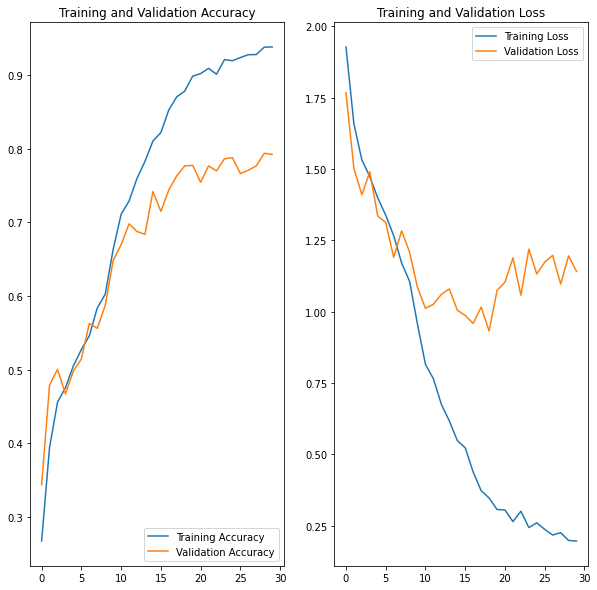

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- With the use of Augmentor library, accuracy got increased significantly

- Model is still seems to be overfitting

- The problem of overfitting can be solved by adding more number of layer,neurons or adding dropout layers.

- The Model can be further improved by tuning the hyperparameter